# Random Forest Models

<img src="https://miro.medium.com/max/1200/0*gOWmG5QY91qK_DoE.png">

<p>
Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.
</p>
<p>Here we are going to implement Random Forest algorithm using Telecom Churn Dataset.</p>

## 0. Loading required libraries 

In [103]:
library(DBI)
library(corrgram)
library(caret) 
library(gridExtra)
library(ggpubr)

## 1. Setting up the code parallelizing

<p>Today is a good practice to start parallelizing your code. The common motivation behind parallel computing is that something is taking too long time. For somebody that means any computation that takes more than 3 minutes – this because parallelization is incredibly simple and most tasks that take time are embarrassingly parallel. Here are a few common tasks that fit the description:
    <ul>
        <li>Bootstrapping</li>
        <li>Cross-validation</li>
        <li>Multivariate Imputation by Chained Equations (MICE)</li>
        <li>Fitting multiple regression models</li>
    </ul>
You can find out more about parallelizing your computations in R - <a href="http://gforge.se/2015/02/how-to-go-parallel-in-r-basics-tips/">here</a>.
</p>

<h3>For Windows users</h3>

In [6]:
# process in parallel on Windows
library(doParallel) 
cl <- makeCluster(detectCores(), type='PSOCK')
registerDoParallel(cl)

<h3>For Mac OSX and Unix like systems users</h3>

In [104]:
# process in parallel on Mac OSX and UNIX like systems
library(doMC)
registerDoMC(cores = 4)

## 2. Importing Data

In [8]:
#Set working directory where CSV is located

#getwd()
#setwd("...YOUR WORKING DIRECTORY WITH A DATASET...")
#getwd()

In [105]:
# Load the DataSets: 
dataSet <- read.csv("TelcoCustomerChurnDataset.csv", header = TRUE, sep = ',')
colnames(dataSet) #Check the dataframe column names

[1] "Account_Length" "Vmail_Message"  "Day_Mins"       "Eve_Mins"      
 [5] "Night_Mins"     "Intl_Mins"      "CustServ_Calls" "Churn"         
 [9] "Intl_Plan"      "Vmail_Plan"     "Day_Calls"      "Day_Charge"    
[13] "Eve_Calls"      "Eve_Charge"     "Night_Calls"    "Night_Charge"  
[17] "Intl_Calls"     "Intl_Charge"    "State"          "Area_Code"     
[21] "Phone"

## 3. Exploring the dataset

In [106]:
# Print top 10 rows in the dataSet
head(dataSet, 10)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,⋯,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<fct>,<fct>,⋯,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<fct>,<int>,<fct>
1,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,⋯,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
2,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,⋯,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
3,137,0,243.4,121.2,162.6,12.2,0,no,no,no,⋯,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
4,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,⋯,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
5,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,⋯,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626
6,118,0,223.4,220.6,203.9,6.3,0,no,yes,no,⋯,37.98,101,18.75,118,9.18,6,1.70,AL,510,391-8027
7,121,24,218.2,348.5,212.6,7.5,3,no,no,yes,⋯,37.09,108,29.62,118,9.57,7,2.03,MA,510,355-9993
8,147,0,157.0,103.1,211.8,7.1,0,no,yes,no,⋯,26.69,94,8.76,96,9.53,6,1.92,MO,415,329-9001
9,117,0,184.5,351.6,215.8,8.7,1,no,no,no,⋯,31.37,80,29.89,90,9.71,4,2.35,LA,408,335-4719


In [107]:
# Print last 10 rows in the dataSet
tail(dataSet, 10)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,⋯,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<fct>,<fct>,<fct>,⋯,<dbl>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<fct>,<int>,<fct>
3324,117,0,118.4,249.3,227.0,13.6,5,yes,no,no,⋯,20.13,97,21.19,56,10.22,3,3.67,IN,415,362-5899
3325,159,0,169.8,197.7,193.7,11.6,1,no,no,no,⋯,28.87,105,16.80,82,8.72,4,3.13,WV,415,377-1164
3326,78,0,193.4,116.9,243.3,9.3,2,no,no,no,⋯,32.88,88,9.94,109,10.95,4,2.51,OH,408,368-8555
3327,96,0,106.6,284.8,178.9,14.9,1,no,no,no,⋯,18.12,87,24.21,92,8.05,7,4.02,OH,415,347-6812
3328,79,0,134.7,189.7,221.4,11.8,2,no,no,no,⋯,22.90,68,16.12,128,9.96,5,3.19,SC,415,348-3830
3329,192,36,156.2,215.5,279.1,9.9,2,no,no,yes,⋯,26.55,126,18.32,83,12.56,6,2.67,AZ,415,414-4276
3330,68,0,231.1,153.4,191.3,9.6,3,no,no,no,⋯,39.29,55,13.04,123,8.61,4,2.59,WV,415,370-3271
3331,28,0,180.8,288.8,191.9,14.1,2,no,no,no,⋯,30.74,58,24.55,91,8.64,6,3.81,RI,510,328-8230
3332,184,0,213.8,159.6,139.2,5.0,2,no,yes,no,⋯,36.35,84,13.57,137,6.26,10,1.35,CT,510,364-6381


In [108]:
# Dimention of Dataset
dim(dataSet)

[1] 3333   21

In [109]:
# Check Data types of each column
table(unlist(lapply(dataSet, class)))


 factor integer numeric 
      5       8       8 

In [110]:
# Check Data types of individual column
data.class(dataSet$Account_Length) 
data.class(dataSet$Vmail_Message) 
data.class(dataSet$Day_Mins)
data.class(dataSet$Eve_Mins)
data.class(dataSet$Night_Mins) 
data.class(dataSet$Intl_Mins)
data.class(dataSet$CustServ_Calls)
data.class(dataSet$Intl_Plan) 
data.class(dataSet$Vmail_Plan)
data.class(dataSet$Day_Calls)
data.class(dataSet$Day_Charge) 
data.class(dataSet$Eve_Calls)
data.class(dataSet$Eve_Charge) 
data.class(dataSet$Night_Calls)
data.class(dataSet$Night_Charge)
data.class(dataSet$Intl_Calls) 
data.class(dataSet$Intl_Charge)
data.class(dataSet$State) 
data.class(dataSet$Phone)
data.class(dataSet$Churn)

[1] "numeric"

[1] "numeric"

[1] "numeric"

[1] "numeric"

[1] "numeric"

[1] "numeric"

[1] "numeric"

[1] "factor"

[1] "factor"

[1] "numeric"

[1] "numeric"

[1] "numeric"

[1] "numeric"

[1] "numeric"

[1] "numeric"

[1] "numeric"

[1] "numeric"

[1] "factor"

[1] "factor"

[1] "factor"

<h4>Converting variables <i>Intl_Plan, Vmail_Plan, State</i> to numeric data type.</h4>

In [111]:
dataSet$Intl_Plan <- as.numeric(dataSet$Intl_Plan)
dataSet$Vmail_Plan <- as.numeric(dataSet$Vmail_Plan)
dataSet$State <- as.numeric(dataSet$State)

In [112]:
# Check Data types of each column
table(unlist(lapply(dataSet, class)))


 factor integer numeric 
      2       8      11 

## 4. Exploring or Summarising dataset with descriptive statistics

In [113]:
# Find out if there is missing value in rows
rowSums(is.na(dataSet))

[1] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [38] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  [75] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [112] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [149] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [223] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [260] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [297] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [334] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [371] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [408] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [445] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [482] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [519] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [556] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [593] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [630] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [667] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [704] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [741] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [778] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [815] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [852] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [889] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [926] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 [963] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1000] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1037] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1074] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1111] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1148] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1185] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1222] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1259] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1296] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1333] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1370] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1407] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1444] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1481] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1518] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1555] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1592] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1629] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1666] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1703] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1740] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1777] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[1814] 0 0 0 0 0 0 0 0 0 0 0 0 0 0

In [114]:
# Find out if there is missing value in columns
colSums(is.na(dataSet))

Account_Length  Vmail_Message       Day_Mins       Eve_Mins     Night_Mins 
             0              0              0              0              0 
     Intl_Mins CustServ_Calls          Churn      Intl_Plan     Vmail_Plan 
             0              0              0              0              0 
     Day_Calls     Day_Charge      Eve_Calls     Eve_Charge    Night_Calls 
             0              0              0              0              0 
  Night_Charge     Intl_Calls    Intl_Charge          State      Area_Code 
             0              0              0              0              0 
         Phone 
             0

<h3>Missing value checking using different packages (<i>mice</i> and <i>VIM</i>)</h3>

 /\     /\
{  `---'  }
{  O   O  }
==>  V <==  No need for mice. This data set is completely observed.
 \  \|/  /
  `-----'



,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,⋯,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone,
3333,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,0
,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


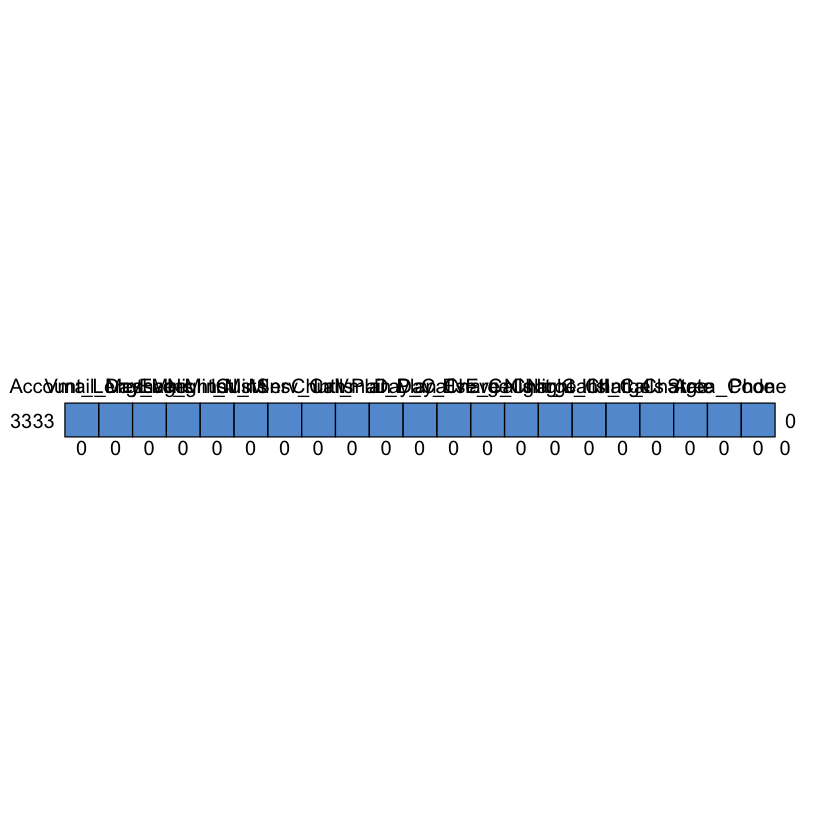

In [115]:
#Checking missing value with the mice package
library(mice)
md.pattern(dataSet)


 Variables sorted by number of missings: 
       Variable Count
 Account_Length     0
  Vmail_Message     0
       Day_Mins     0
       Eve_Mins     0
     Night_Mins     0
      Intl_Mins     0
 CustServ_Calls     0
          Churn     0
      Intl_Plan     0
     Vmail_Plan     0
      Day_Calls     0
     Day_Charge     0
      Eve_Calls     0
     Eve_Charge     0
    Night_Calls     0
   Night_Charge     0
     Intl_Calls     0
    Intl_Charge     0
          State     0
      Area_Code     0
          Phone     0


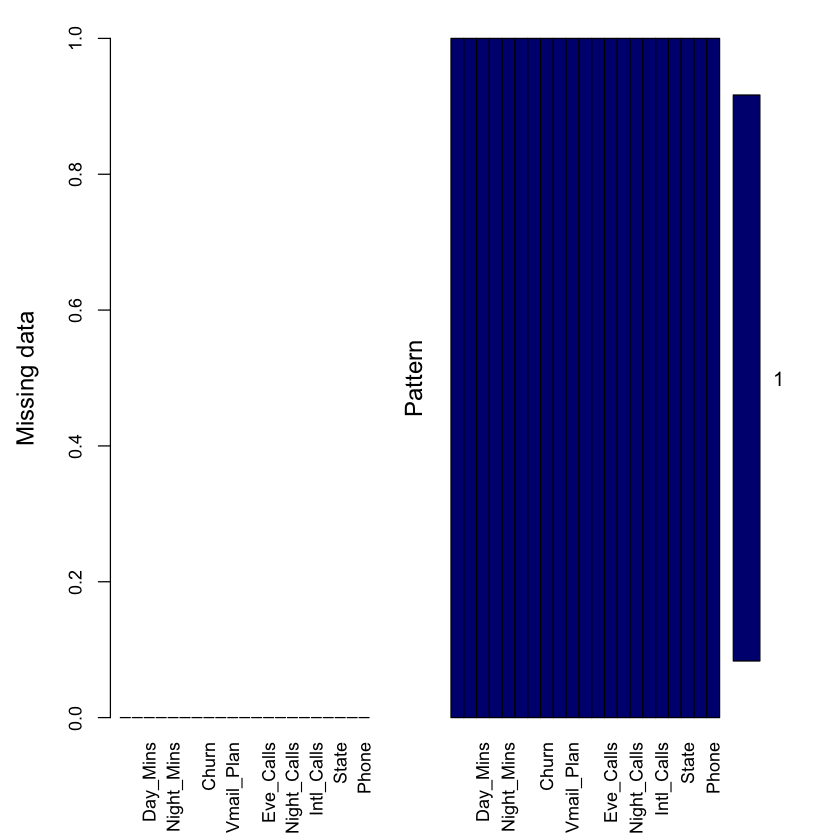

In [116]:
#Checking missing value with the VIM package
library(VIM)
mice_plot <- aggr(dataSet, col=c('navyblue','yellow'),
                  numbers=TRUE, sortVars=TRUE,
                  labels=names(dataSet[1:21]), cex.axis=.9,
                  gap=3, ylab=c("Missing data","Pattern"))

<p>After the observation, we can claim that dataset contains no missing values.</p>

<h3>Summary of dataset</h3>

In [117]:
# Selecting just columns with numeric data type
numericalCols <- colnames(dataSet[c(1:7,9:20)])

<p>Difference between the <b>lapply</b> and <b>sapply</b> functions <i>(we will use them in the next 2 cells)</i>:<br>
We use <b>lapply</b> - when we want to apply a function to each element of a <i>list</i> in turn and get a <i>list back</i>.<br>
We use <b>sapply</b> - when we want to apply a function to each element of a <i>list</i> in turn, but we want a <i>vector back</i>, rather than a list.<br>
</p>

<h4>Finding statistics metrics with <i>lapply</i> function</h4>

In [118]:
#Sum
lapply(dataSet[numericalCols], FUN = sum)

$Account_Length
[1] 336849

$Vmail_Message
[1] 26994

$Day_Mins
[1] 599190.4

$Eve_Mins
[1] 669867.5

$Night_Mins
[1] 669506.5

$Intl_Mins
[1] 34120.9

$CustServ_Calls
[1] 5209

$Intl_Plan
[1] 3656

$Vmail_Plan
[1] 4255

$Day_Calls
[1] 334752

$Day_Charge
[1] 101864.2

$Eve_Calls
[1] 333681

$Eve_Charge
[1] 56939.44

$Night_Calls
[1] 333659

$Night_Charge
[1] 30128.07

$Intl_Calls
[1] 14930

$Intl_Charge
[1] 9214.35

$State
[1] 90189

$Area_Code
[1] 1457129

In [119]:
#Mean
lapply(dataSet[numericalCols], FUN = mean)

$Account_Length
[1] 101.0648

$Vmail_Message
[1] 8.09901

$Day_Mins
[1] 179.7751

$Eve_Mins
[1] 200.9803

$Night_Mins
[1] 200.872

$Intl_Mins
[1] 10.23729

$CustServ_Calls
[1] 1.562856

$Intl_Plan
[1] 1.09691

$Vmail_Plan
[1] 1.276628

$Day_Calls
[1] 100.4356

$Day_Charge
[1] 30.56231

$Eve_Calls
[1] 100.1143

$Eve_Charge
[1] 17.08354

$Night_Calls
[1] 100.1077

$Night_Charge
[1] 9.039325

$Intl_Calls
[1] 4.479448

$Intl_Charge
[1] 2.764581

$State
[1] 27.05941

$Area_Code
[1] 437.1824

In [120]:
#median
lapply(dataSet[numericalCols], FUN = median)

$Account_Length
[1] 101

$Vmail_Message
[1] 0

$Day_Mins
[1] 179.4

$Eve_Mins
[1] 201.4

$Night_Mins
[1] 201.2

$Intl_Mins
[1] 10.3

$CustServ_Calls
[1] 1

$Intl_Plan
[1] 1

$Vmail_Plan
[1] 1

$Day_Calls
[1] 101

$Day_Charge
[1] 30.5

$Eve_Calls
[1] 100

$Eve_Charge
[1] 17.12

$Night_Calls
[1] 100

$Night_Charge
[1] 9.05

$Intl_Calls
[1] 4

$Intl_Charge
[1] 2.78

$State
[1] 27

$Area_Code
[1] 415

In [121]:
#Min
lapply(dataSet[numericalCols], FUN = min)

$Account_Length
[1] 1

$Vmail_Message
[1] 0

$Day_Mins
[1] 0

$Eve_Mins
[1] 0

$Night_Mins
[1] 23.2

$Intl_Mins
[1] 0

$CustServ_Calls
[1] 0

$Intl_Plan
[1] 1

$Vmail_Plan
[1] 1

$Day_Calls
[1] 0

$Day_Charge
[1] 0

$Eve_Calls
[1] 0

$Eve_Charge
[1] 0

$Night_Calls
[1] 33

$Night_Charge
[1] 1.04

$Intl_Calls
[1] 0

$Intl_Charge
[1] 0

$State
[1] 1

$Area_Code
[1] 408

In [122]:
#Max
lapply(dataSet[numericalCols], FUN = max)

$Account_Length
[1] 243

$Vmail_Message
[1] 51

$Day_Mins
[1] 350.8

$Eve_Mins
[1] 363.7

$Night_Mins
[1] 395

$Intl_Mins
[1] 20

$CustServ_Calls
[1] 9

$Intl_Plan
[1] 2

$Vmail_Plan
[1] 2

$Day_Calls
[1] 165

$Day_Charge
[1] 59.64

$Eve_Calls
[1] 170

$Eve_Charge
[1] 30.91

$Night_Calls
[1] 175

$Night_Charge
[1] 17.77

$Intl_Calls
[1] 20

$Intl_Charge
[1] 5.4

$State
[1] 51

$Area_Code
[1] 510

In [123]:
#Length
lapply(dataSet[numericalCols], FUN = length)

$Account_Length
[1] 3333

$Vmail_Message
[1] 3333

$Day_Mins
[1] 3333

$Eve_Mins
[1] 3333

$Night_Mins
[1] 3333

$Intl_Mins
[1] 3333

$CustServ_Calls
[1] 3333

$Intl_Plan
[1] 3333

$Vmail_Plan
[1] 3333

$Day_Calls
[1] 3333

$Day_Charge
[1] 3333

$Eve_Calls
[1] 3333

$Eve_Charge
[1] 3333

$Night_Calls
[1] 3333

$Night_Charge
[1] 3333

$Intl_Calls
[1] 3333

$Intl_Charge
[1] 3333

$State
[1] 3333

$Area_Code
[1] 3333

<h4>Finding statistics metrics with <i>sapply</i> function</h4>

In [124]:
# Sum
sapply(dataSet[numericalCols], FUN = sum)

Account_Length  Vmail_Message       Day_Mins       Eve_Mins     Night_Mins 
     336849.00       26994.00      599190.40      669867.50      669506.50 
     Intl_Mins CustServ_Calls      Intl_Plan     Vmail_Plan      Day_Calls 
      34120.90        5209.00        3656.00        4255.00      334752.00 
    Day_Charge      Eve_Calls     Eve_Charge    Night_Calls   Night_Charge 
     101864.17      333681.00       56939.44      333659.00       30128.07 
    Intl_Calls    Intl_Charge          State      Area_Code 
      14930.00        9214.35       90189.00     1457129.00

In [125]:
# Mean
sapply(dataSet[numericalCols], FUN = mean)

Account_Length  Vmail_Message       Day_Mins       Eve_Mins     Night_Mins 
    101.064806       8.099010     179.775098     200.980348     200.872037 
     Intl_Mins CustServ_Calls      Intl_Plan     Vmail_Plan      Day_Calls 
     10.237294       1.562856       1.096910       1.276628     100.435644 
    Day_Charge      Eve_Calls     Eve_Charge    Night_Calls   Night_Charge 
     30.562307     100.114311      17.083540     100.107711       9.039325 
    Intl_Calls    Intl_Charge          State      Area_Code 
      4.479448       2.764581      27.059406     437.182418

In [126]:
# Median
sapply(dataSet[numericalCols], FUN = median)

Account_Length  Vmail_Message       Day_Mins       Eve_Mins     Night_Mins 
        101.00           0.00         179.40         201.40         201.20 
     Intl_Mins CustServ_Calls      Intl_Plan     Vmail_Plan      Day_Calls 
         10.30           1.00           1.00           1.00         101.00 
    Day_Charge      Eve_Calls     Eve_Charge    Night_Calls   Night_Charge 
         30.50         100.00          17.12         100.00           9.05 
    Intl_Calls    Intl_Charge          State      Area_Code 
          4.00           2.78          27.00         415.00

In [127]:
# Min
sapply(dataSet[numericalCols], FUN = min)

Account_Length  Vmail_Message       Day_Mins       Eve_Mins     Night_Mins 
          1.00           0.00           0.00           0.00          23.20 
     Intl_Mins CustServ_Calls      Intl_Plan     Vmail_Plan      Day_Calls 
          0.00           0.00           1.00           1.00           0.00 
    Day_Charge      Eve_Calls     Eve_Charge    Night_Calls   Night_Charge 
          0.00           0.00           0.00          33.00           1.04 
    Intl_Calls    Intl_Charge          State      Area_Code 
          0.00           0.00           1.00         408.00

In [128]:
# Max
sapply(dataSet[numericalCols], FUN = max)

Account_Length  Vmail_Message       Day_Mins       Eve_Mins     Night_Mins 
        243.00          51.00         350.80         363.70         395.00 
     Intl_Mins CustServ_Calls      Intl_Plan     Vmail_Plan      Day_Calls 
         20.00           9.00           2.00           2.00         165.00 
    Day_Charge      Eve_Calls     Eve_Charge    Night_Calls   Night_Charge 
         59.64         170.00          30.91         175.00          17.77 
    Intl_Calls    Intl_Charge          State      Area_Code 
         20.00           5.40          51.00         510.00

In [129]:
# Length
sapply(dataSet[numericalCols], FUN = length)

Account_Length  Vmail_Message       Day_Mins       Eve_Mins     Night_Mins 
          3333           3333           3333           3333           3333 
     Intl_Mins CustServ_Calls      Intl_Plan     Vmail_Plan      Day_Calls 
          3333           3333           3333           3333           3333 
    Day_Charge      Eve_Calls     Eve_Charge    Night_Calls   Night_Charge 
          3333           3333           3333           3333           3333 
    Intl_Calls    Intl_Charge          State      Area_Code 
          3333           3333           3333           3333

<p>In the next few cells, you will find three different options on how to aggregate data.</p>

In [130]:
# OPTION 1: (Using Aggregate FUNCTION - all variables together)
aggregate(dataSet[numericalCols], list(dataSet$Churn), summary)

Group.1,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code
<fct>,"<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>","<dbl[,6]>"
no,"1, 73, 100, 100.7937, 127, 243","0, 0, 0, 8.604561, 22, 51","0, 142.825, 177.2, 175.1758, 210.30, 315.6","0.0, 164.5, 199.6, 199.0433, 233.20, 361.8","23.2, 165.90, 200.25, 200.1332, 234.90, 395.0","0, 8.4, 10.2, 10.15888, 12.0, 18.9","0, 1, 1, 1.449825, 2, 8","1, 1, 1, 1.065263, 1, 2","1, 1, 1, 1.295439, 2, 2","0, 87.0, 100, 100.2832, 114.0, 163","0, 24.2825, 30.12, 29.78042, 35.75, 53.65","0, 87, 100, 100.0386, 114, 170","0.00, 13.980, 16.97, 16.91891, 19.820, 30.75","33, 87, 100, 100.0582, 113, 175","1.04, 7.470, 9.01, 9.006074, 10.570, 17.77","0, 3, 4, 4.532982, 6, 19","0.00, 2.27, 2.75, 2.743404, 3.24, 5.1","1, 14, 27, 27.01193, 40, 51","408, 408, 415, 437.0747, 510, 510"
yes,"1, 76, 103, 102.6646, 127, 225","0, 0, 0, 5.115942, 0, 48","0, 153.250, 217.6, 206.9141, 265.95, 350.8","70.9, 177.1, 211.3, 212.4101, 249.45, 363.7","47.4, 171.25, 204.80, 205.2317, 239.85, 354.9","2, 8.8, 10.6, 10.70000, 12.8, 20.0","0, 1, 2, 2.229814, 4, 9","1, 1, 1, 1.283644, 2, 2","1, 1, 1, 1.165631, 1, 2","0, 87.5, 103, 101.3354, 116.5, 165","0, 26.0550, 36.99, 35.17592, 45.21, 59.64","48, 87, 101, 100.5611, 114, 168","6.03, 15.055, 17.96, 18.05497, 21.205, 30.91","49, 85, 100, 100.3996, 115, 158","2.13, 7.705, 9.22, 9.235528, 10.795, 15.97","1, 2, 4, 4.163561, 5, 20","0.54, 2.38, 2.86, 2.889545, 3.46, 5.4","1, 17, 27, 27.33954, 39, 51","408, 408, 415, 437.8178, 510, 510"


In [131]:
# OPTION 2: (Using Aggregate FUNCTION - variables separately)
aggregate(dataSet$Intl_Mins, list(dataSet$Churn), summary)
aggregate(dataSet$Day_Mins, list(dataSet$Churn), summary)
aggregate(dataSet$Night_Mins, list(dataSet$Churn), summary)

Group.1,x
<fct>,"<dbl[,6]>"
no,"0, 8.4, 10.2, 10.15888, 12.0, 18.9"
yes,"2, 8.8, 10.6, 10.70000, 12.8, 20.0"


Group.1,x
<fct>,"<dbl[,6]>"
no,"0, 142.825, 177.2, 175.1758, 210.30, 315.6"
yes,"0, 153.250, 217.6, 206.9141, 265.95, 350.8"


Group.1,x
<fct>,"<dbl[,6]>"
no,"23.2, 165.90, 200.25, 200.1332, 234.90, 395.0"
yes,"47.4, 171.25, 204.80, 205.2317, 239.85, 354.9"


In [132]:
# OPTION 3: (Using "by" FUNCTION instead of "Aggregate" FUNCTION)
by(dataSet$Intl_Mins, dataSet[8], FUN = summary)
by(dataSet$Day_Mins, dataSet[8], FUN = summary)
by(dataSet$Night_Mins, dataSet[8], FUN = summary)

Churn: no
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    8.40   10.20   10.16   12.00   18.90 
------------------------------------------------------------ 
Churn: yes
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    2.0     8.8    10.6    10.7    12.8    20.0 

Churn: no
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   142.8   177.2   175.2   210.3   315.6 
------------------------------------------------------------ 
Churn: yes
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   153.2   217.6   206.9   265.9   350.8 

Churn: no
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   23.2   165.9   200.2   200.1   234.9   395.0 
------------------------------------------------------------ 
Churn: yes
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   47.4   171.2   204.8   205.2   239.8   354.9 

<h4>Find out correlation</h4>

In [133]:
# Correlations/covariances among numeric variables 
library(Hmisc)
cor(dataSet[c(2,5,11,13,16,18)], use="complete.obs", method="kendall") 
cov(dataSet[c(2,5,11,13,16,18)], use="complete.obs")

,Vmail_Message,Night_Mins,Day_Calls,Eve_Calls,Night_Charge,Intl_Charge
Vmail_Message,1.000000000,0.003718463,-0.009573189,-5.382921e-03,0.003710434,-1.263503e-03
Night_Mins,0.003718463,1.000000000,0.012550159,3.291091e-03,0.999625309,-7.103399e-03
Day_Calls,-0.009573189,0.012550159,1.000000000,9.253492e-03,0.012531632,1.038631e-02
Eve_Calls,-0.005382921,0.003291091,0.009253492,1.000000e+00,0.003310838,-9.536135e-05
Night_Charge,0.003710434,0.999625309,0.012531632,3.310838e-03,1.000000000,-7.097366e-03
Intl_Charge,-0.001263503,-0.007103399,0.010386309,-9.536135e-05,-0.007097366,1.000000e+00


,Vmail_Message,Night_Mins,Day_Calls,Eve_Calls,Night_Charge,Intl_Charge
Vmail_Message,187.37134656,5.3174453,-2.6229779,-1.59925653,0.23873433,0.02975334
Night_Mins,5.31744529,2557.7140018,23.2812431,-2.10859729,115.09955435,-0.57867377
Day_Calls,-2.62297790,23.2812431,402.7681409,2.58373944,1.04716693,0.32775442
Eve_Calls,-1.59925653,-2.1085973,2.5837394,396.91099860,-0.09322113,0.13025644
Night_Charge,0.23873433,115.0995543,1.0471669,-0.09322113,5.17959717,-0.02605168
Intl_Charge,0.02975334,-0.5786738,0.3277544,0.13025644,-0.02605168,0.56817315


In [134]:
# Correlations with significance levels
rcorr(as.matrix(dataSet[c(2,5,11,13,16,18)]), type="pearson")

              Vmail_Message Night_Mins Day_Calls Eve_Calls Night_Charge
Vmail_Message          1.00       0.01     -0.01     -0.01         0.01
Night_Mins             0.01       1.00      0.02      0.00         1.00
Day_Calls             -0.01       0.02      1.00      0.01         0.02
Eve_Calls             -0.01       0.00      0.01      1.00         0.00
Night_Charge           0.01       1.00      0.02      0.00         1.00
Intl_Charge            0.00      -0.02      0.02      0.01        -0.02
              Intl_Charge
Vmail_Message        0.00
Night_Mins          -0.02
Day_Calls            0.02
Eve_Calls            0.01
Night_Charge        -0.02
Intl_Charge          1.00

n= 3333 


P
              Vmail_Message Night_Mins Day_Calls Eve_Calls Night_Charge
Vmail_Message               0.6576     0.5816    0.7350    0.6583      
Night_Mins    0.6576                   0.1855    0.9039    0.0000      
Day_Calls     0.5816        0.1855               0.7092    0.1857      
Eve_Calls   

## 5. Visualising DataSet

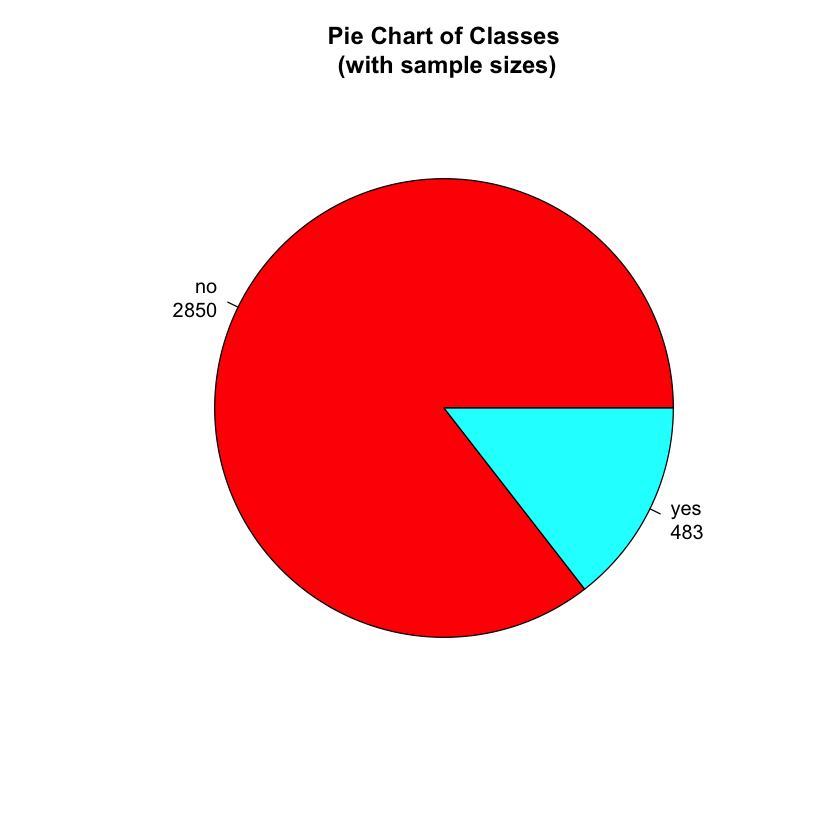

In [135]:
# Pie Chart from data 
mytable <- table(dataSet$Churn)
lbls <- paste(names(mytable), "\n", mytable, sep="")
pie(mytable, labels = lbls, col=rainbow(length(lbls)), 
    main="Pie Chart of Classes\n (with sample sizes)")

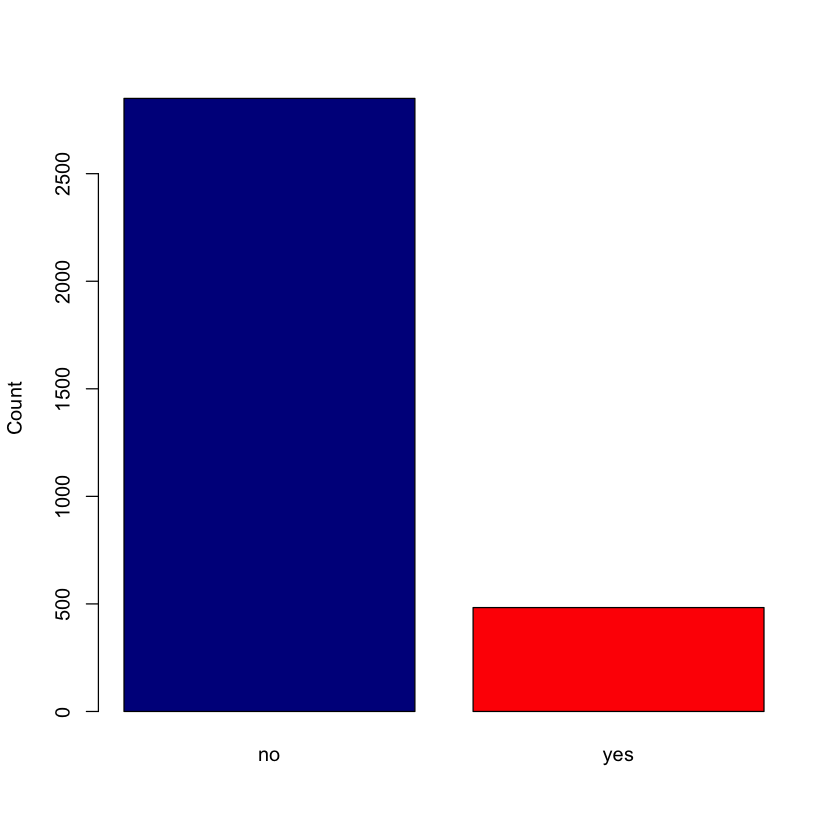

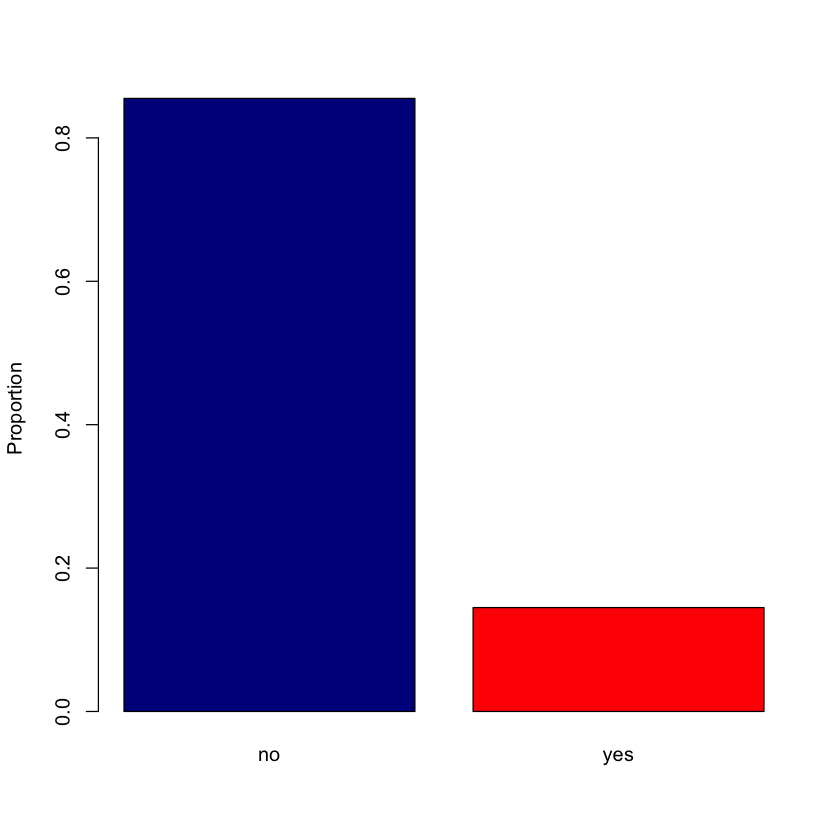

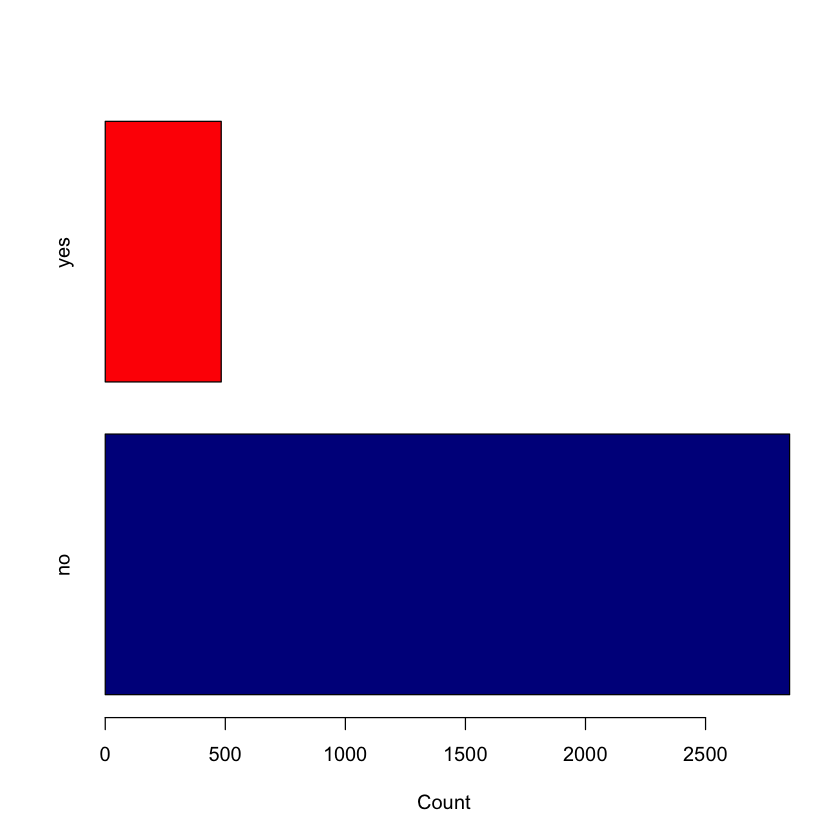

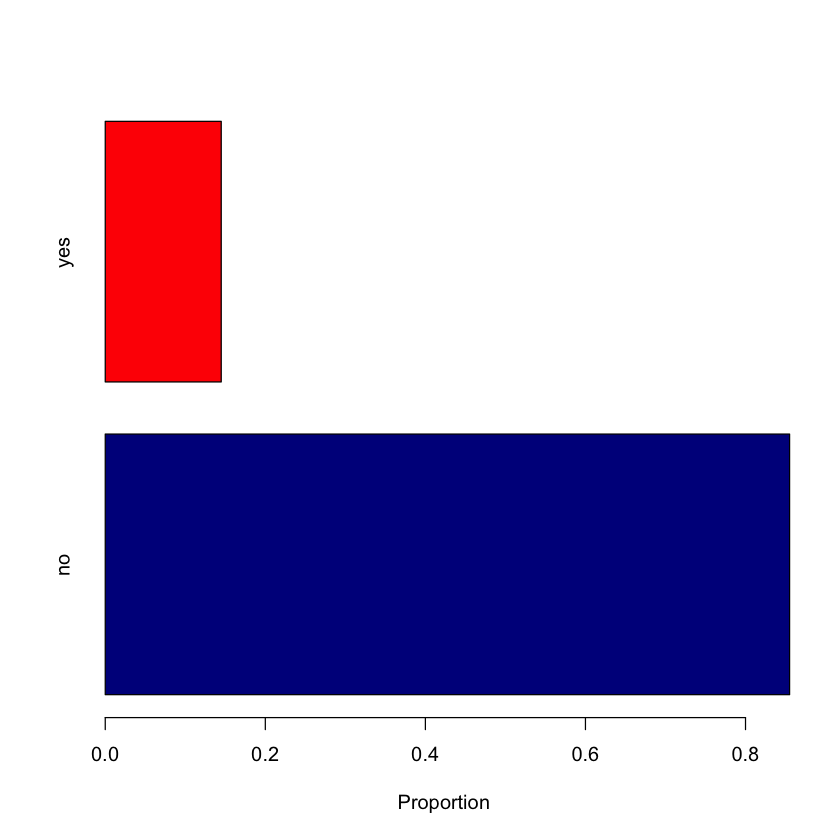

In [136]:
# Barplot of categorical data
par(mfrow=c(1,1))
barplot(table(dataSet$Churn), ylab = "Count", 
        col=c("darkblue","red"))
barplot(prop.table(table(dataSet$Churn)), ylab = "Proportion", 
        col=c("darkblue","red"))
barplot(table(dataSet$Churn), xlab = "Count", horiz = TRUE, 
        col=c("darkblue","red"))
barplot(prop.table(table(dataSet$Churn)), xlab = "Proportion", horiz = TRUE, 
        col=c("darkblue","red"))

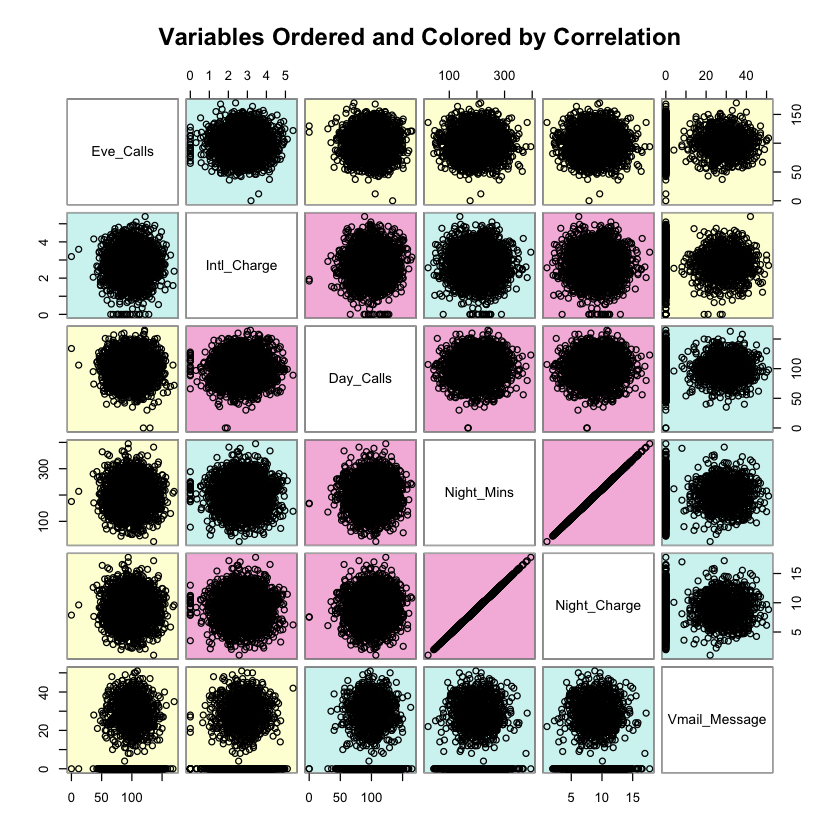

In [137]:
# Scatterplot Matrices from the glus Package 
library(gclus)
dta <- dataSet[c(2,5,11,13,16,18)] # get data 
dta.r <- abs(cor(dta)) # get correlations
dta.col <- dmat.color(dta.r) # get colors
# reorder variables so those with highest correlation are closest to the diagonal
dta.o <- order.single(dta.r) 
cpairs(dta, dta.o, panel.colors=dta.col, gap=.5, 
       main="Variables Ordered and Colored by Correlation" )

<h3>Visualise correlations</h3>

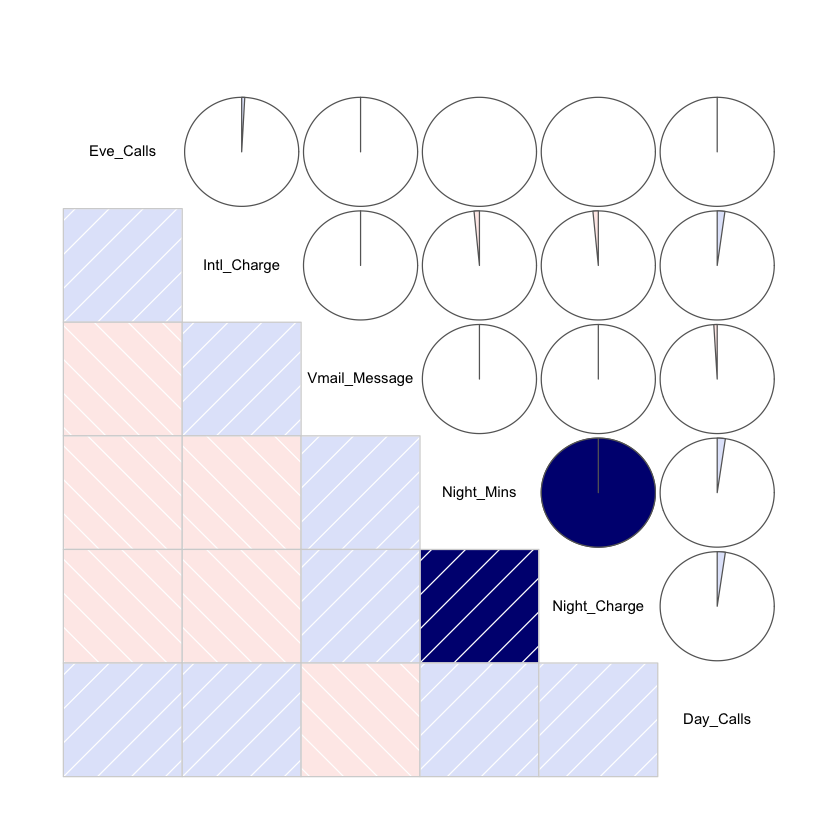

In [138]:
corrgram(dataSet[c(2,5,11,13,16,18)], order=TRUE, lower.panel=panel.shade,
         upper.panel=panel.pie, text.panel=panel.txt, main=" ")

In [139]:
# More graphs on correlatios amaong data
# Using "Hmisc"
res2 <- rcorr(as.matrix(dataSet[,c(2,5,11,13,16,18)]))
# Extract the correlation coefficients
res2$r
# Extract p-values
res2$P

,Vmail_Message,Night_Mins,Day_Calls,Eve_Calls,Night_Charge,Intl_Charge
Vmail_Message,1.000000000,0.007681136,-0.009548068,-0.005864351,0.007663290,0.002883658
Night_Mins,0.007681136,1.000000000,0.022937845,-0.002092768,0.999999215,-0.015179849
Day_Calls,-0.009548068,0.022937845,1.000000000,0.006462114,0.022926638,0.021666095
Eve_Calls,-0.005864351,-0.002092768,0.006462114,1.000000000,-0.002055984,0.008673858
Night_Charge,0.007663290,0.999999215,0.022926638,-0.002055984,1.000000000,-0.015186139
Intl_Charge,0.002883658,-0.015179849,0.021666095,0.008673858,-0.015186139,1.000000000


,Vmail_Message,Night_Mins,Day_Calls,Eve_Calls,Night_Charge,Intl_Charge
Vmail_Message,NA,0.6575570,0.5816089,0.7350335,0.6583020,0.8678283
Night_Mins,0.6575570,NA,0.1855268,0.9038694,0.0000000,0.3809828
Day_Calls,0.5816089,0.1855268,NA,0.7091964,0.1857418,0.2111142
Eve_Calls,0.7350335,0.9038694,0.7091964,NA,0.9055511,0.6166654
Night_Charge,0.6583020,0.0000000,0.1857418,0.9055511,NA,0.3807855
Intl_Charge,0.8678283,0.3809828,0.2111142,0.6166654,0.3807855,NA


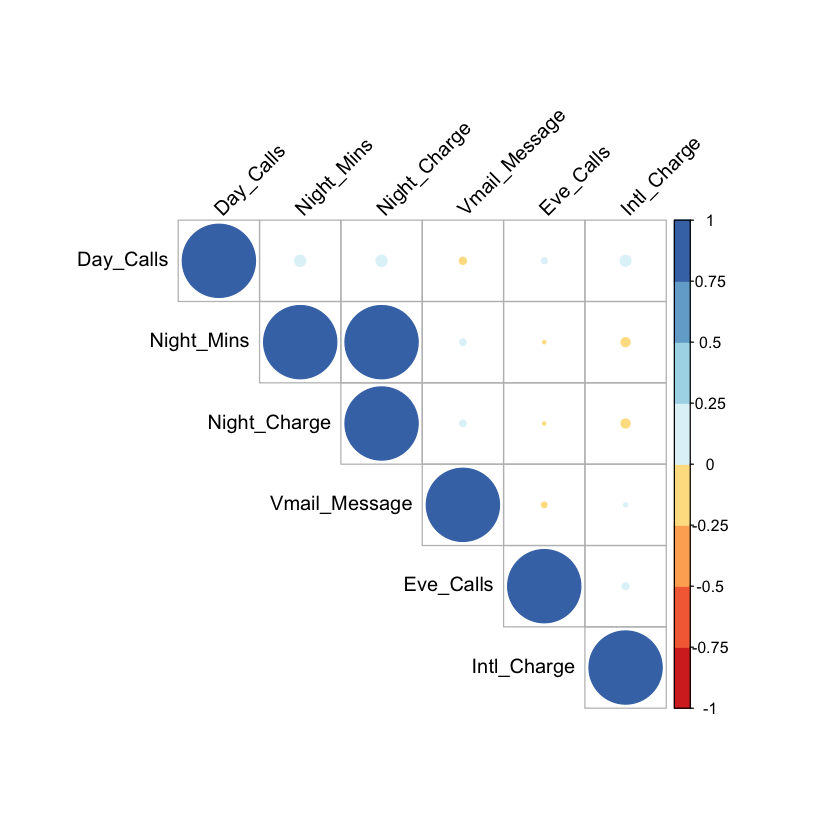

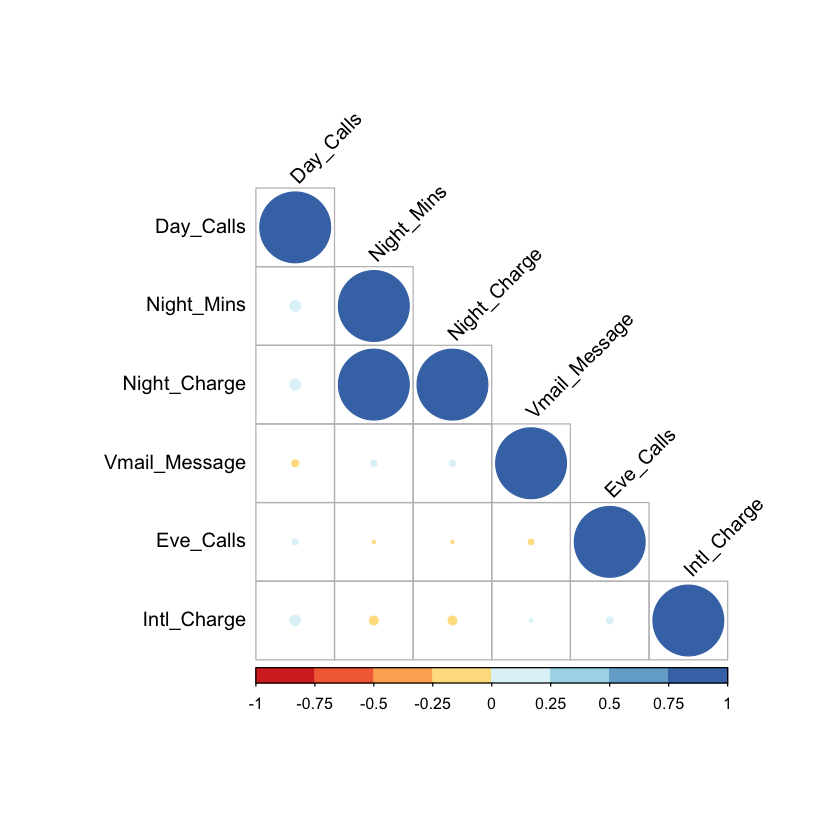

In [140]:
# Using "corrplot"
library(corrplot)
library(RColorBrewer)
corrplot(res2$r, type = "upper", order = "hclust", col=brewer.pal(n=8, name="RdYlBu"),
         tl.col = "black", tl.srt = 45)
corrplot(res2$r, type = "lower", order = "hclust", col=brewer.pal(n=8, name="RdYlBu"),
         tl.col = "black", tl.srt = 45)

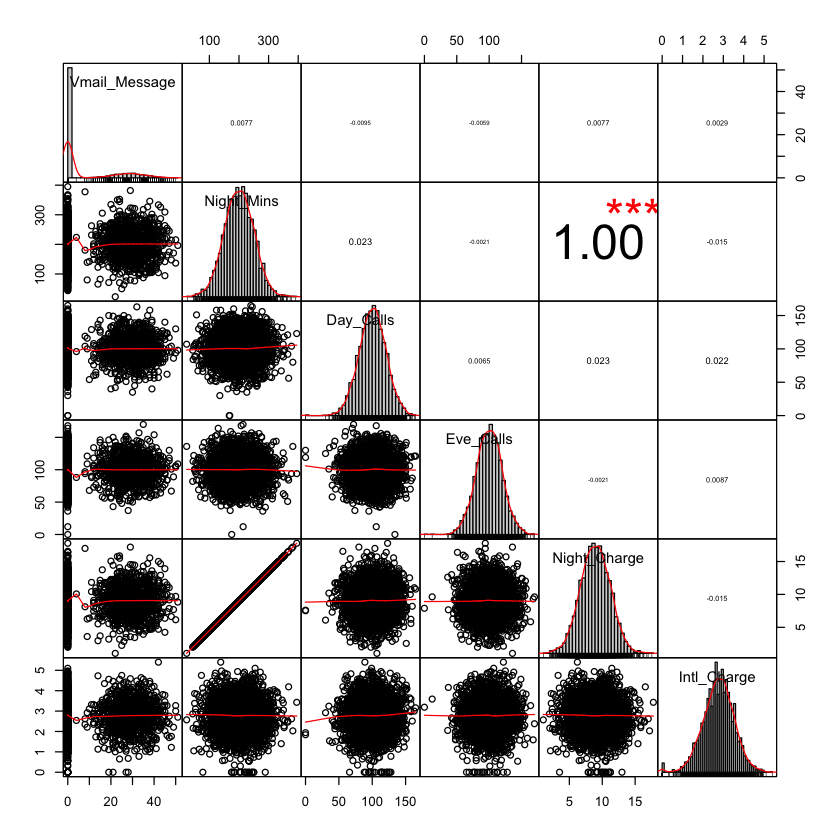

In [141]:
# Using PerformanceAnalytics
library(PerformanceAnalytics)
data <- dataSet[, c(2,5,11,13,16,18)]
chart.Correlation(data, histogram=TRUE, pch=19)

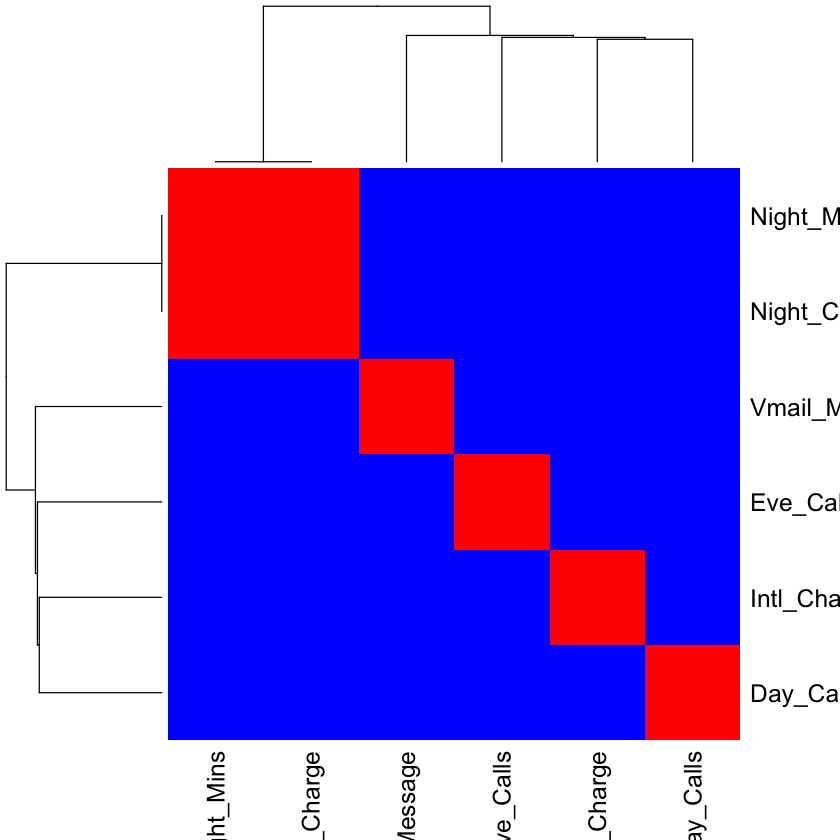

In [142]:
# Using Colored Headmap 
col <- colorRampPalette(c("blue", "white", "red"))(20)
heatmap(x = res2$r, col = col, symm = TRUE)

<p>We should notice that <b><i>Night_Mins</i></b> and <b><i>Night_Charge</i></b> have a strong, linear, positive relationship.</p>

## 6. Pre-Processing of DataSet i.e. train (75%) : test (25%) split

In [143]:
train_test_index <- createDataPartition(dataSet$Churn, p=0.75, list=FALSE)
training_dataset <- dataSet[, c(1:20)][train_test_index,]
testing_dataset  <- dataSet[, c(1:20)][-train_test_index,]

In [144]:
dim(training_dataset)
dim(testing_dataset)

[1] 2501   20

[1] 832  20

## 7. Cross Validation and control parameter setup

In [145]:
control <- trainControl(method="repeatedcv", # repeatedcv / adaptive_cv
                        number=2, repeats = 2, 
                        verbose = TRUE, search = "grid",
                        allowParallel = TRUE)
metric <- "Accuracy"
tuneLength = 2

## 8. Algorithm : Random Forest Models e.g.

In [80]:
names(getModelInfo())

[1] "ada"                 "AdaBag"              "AdaBoost.M1"        
  [4] "adaboost"            "amdai"               "ANFIS"              
  [7] "avNNet"              "awnb"                "awtan"              
 [10] "bag"                 "bagEarth"            "bagEarthGCV"        
 [13] "bagFDA"              "bagFDAGCV"           "bam"                
 [16] "bartMachine"         "bayesglm"            "binda"              
 [19] "blackboost"          "blasso"              "blassoAveraged"     
 [22] "bridge"              "brnn"                "BstLm"              
 [25] "bstSm"               "bstTree"             "C5.0"               
 [28] "C5.0Cost"            "C5.0Rules"           "C5.0Tree"           
 [31] "cforest"             "chaid"               "CSimca"             
 [34] "ctree"               "ctree2"              "cubist"             
 [37] "dda"                 "deepboost"           "DENFIS"             
 [40] "dnn"                 "dwdLinear"           "dwdPoly"            
 [43] "dwdRadial"           "earth"               "elm"                
 [46] "enet"                "evtree"              "extraTrees"         
 [49] "fda"                 "FH.GBML"             "FIR.DM"             
 [52] "foba"                "FRBCS.CHI"           "FRBCS.W"            
 [55] "FS.HGD"              "gam"                 "gamboost"           
 [58] "gamLoess"            "gamSpline"           "gaussprLinear"      
 [61] "gaussprPoly"         "gaussprRadial"       "gbm_h2o"            
 [64] "gbm"                 "gcvEarth"            "GFS.FR.MOGUL"       
 [67] "GFS.LT.RS"           "GFS.THRIFT"          "glm.nb"             
 [70] "glm"                 "glmboost"            "glmnet_h2o"         
 [73] "glmnet"              "glmStepAIC"          "gpls"               
 [76] "hda"                 "hdda"                "hdrda"              
 [79] "HYFIS"               "icr"                 "J48"                
 [82] "JRip"                "kernelpls"           "kknn"               
 [85] "knn"                 "krlsPoly"            "krlsRadial"         
 [88] "lars"                "lars2"               "lasso"              
 [91] "lda"                 "lda2"                "leapBackward"       
 [94] "leapForward"         "leapSeq"             "Linda"              
 [97] "lm"                  "lmStepAIC"           "LMT"                
[100] "loclda"              "logicBag"            "LogitBoost"         
[103] "logreg"              "lssvmLinear"         "lssvmPoly"          
[106] "lssvmRadial"         "lvq"                 "M5"                 
[109] "M5Rules"             "manb"                "mda"                
[112] "Mlda"                "mlp"                 "mlpKerasDecay"      
[115] "mlpKerasDecayCost"   "mlpKerasDropout"     "mlpKerasDropoutCost"
[118] "mlpML"               "mlpSGD"              "mlpWeightDecay"     
[121] "mlpWeightDecayML"    "monmlp"              "msaenet"            
[124] "multinom"            "mxnet"               "mxnetAdam"          
[127] "naive_bayes"         "nb"                  "nbDiscrete"         
[130] "nbSearch"            "neuralnet"           "nnet"               
[133] "nnls"                "nodeHarvest"         "null"               
[136] "OneR"                "ordinalNet"          "ordinalRF"          
[139] "ORFlog"              "ORFpls"              "ORFridge"           
[142] "ORFsvm"              "ownn"                "pam"                
[145] "parRF"               "PART"                "partDSA"            
[148] "pcaNNet"             "pcr"                 "pda"                
[151] "pda2"                "penalized"           "PenalizedLDA"       
[154] "plr"                 "pls"                 "plsRglm"            
[157] "polr"                "ppr"                 "PRIM"               
[160] "protoclass"          "qda"                 "QdaCov"             
[163] "qrf"                 "qrnn"                "randomGLM"          
[166] "ranger"              "rbf"         

In [81]:
getModelInfo("parRF"); getModelInfo("rf"); getModelInfo("ranger");

parameter,class,label
<chr>,<chr>,<chr>
mtry,numeric,#Randomly Selected Predictors


parameter,class,label
<chr>,<chr>,<chr>
mtry,numeric,#Randomly Selected Predictors
parameter,class,label
<chr>,<chr>,<chr>
mtry,numeric,#Randomly Selected Predictors
parameter,class,label
<chr>,<chr>,<chr>
mtry,numeric,#Randomly Selected Predictors
maxdepth,numeric,Maximum Rule Depth
parameter,class,label


parameter,class,label
<chr>,<chr>,<chr>
mtry,numeric,#Randomly Selected Predictors
splitrule,character,Splitting Rule
min.node.size,numeric,Minimal Node Size


<h3>1) Training - without explicit parameter tuning / using default</h3>

In [146]:
# parRF
fit.parRF <- caret::train(Churn~., data=training_dataset, method="parRF", 
                          metric=metric, 
                          trControl=control,
                          verbose = TRUE
)
print(fit.parRF)

Aggregating results
Selecting tuning parameters
Fitting mtry = 10 on full training set
Parallel Random Forest 

2501 samples
  19 predictor
   2 classes: 'no', 'yes' 

No pre-processing
Resampling: Cross-Validated (2 fold, repeated 2 times) 
Summary of sample sizes: 1250, 1251, 1251, 1250 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.9086380  0.5077491
  10    0.9470203  0.7644484
  19    0.9444217  0.7540583

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 10.


In [147]:
# rf
fit.rf <- caret::train(Churn~., data=training_dataset, method="rf", 
                       metric=metric, 
                       trControl=control,
                       verbose = TRUE
)
print(fit.rf)

Aggregating results
Selecting tuning parameters
Fitting mtry = 10 on full training set
Random Forest 

2501 samples
  19 predictor
   2 classes: 'no', 'yes' 

No pre-processing
Resampling: Cross-Validated (2 fold, repeated 2 times) 
Summary of sample sizes: 1251, 1250, 1250, 1251 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.9058376  0.4868648
  10    0.9434216  0.7516935
  19    0.9394238  0.7352244

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 10.


In [148]:
# ranger
fit.ranger <- caret::train(Churn~., data=training_dataset, method="ranger", 
                           metric=metric, 
                           trControl=control,
                           verbose = TRUE
)
print(fit.ranger)

Aggregating results
Selecting tuning parameters
Fitting mtry = 19, splitrule = extratrees, min.node.size = 1 on full training set
Random Forest 

2501 samples
  19 predictor
   2 classes: 'no', 'yes' 

No pre-processing
Resampling: Cross-Validated (2 fold, repeated 2 times) 
Summary of sample sizes: 1250, 1251, 1251, 1250 
Resampling results across tuning parameters:

  mtry  splitrule   Accuracy   Kappa    
   2    gini        0.9058377  0.4908199
   2    extratrees  0.8718526  0.1858020
  10    gini        0.9448222  0.7561194
  10    extratrees  0.9380245  0.7165481
  19    gini        0.9440224  0.7533904
  19    extratrees  0.9462216  0.7644075

Tuning parameter 'min.node.size' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 19, splitrule = extratrees
 and min.node.size = 1.


<h3>2) Training - with explicit parameter tuning using preProcess method</h3>

In [149]:
# parRF
fit.parRF_preProc <- caret::train(Churn~., data=training_dataset, method="parRF", 
                                  metric=metric, 
                                  trControl=control,
                                  preProc=c("center", "scale"), 
                                  verbose = TRUE
)
print(fit.parRF_preProc)

Aggregating results
Selecting tuning parameters
Fitting mtry = 10 on full training set
Parallel Random Forest 

2501 samples
  19 predictor
   2 classes: 'no', 'yes' 

Pre-processing: centered (19), scaled (19) 
Resampling: Cross-Validated (2 fold, repeated 2 times) 
Summary of sample sizes: 1250, 1251, 1250, 1251 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.9046369  0.4797720
  10    0.9458230  0.7612490
  19    0.9400249  0.7353601

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 10.


In [150]:
# rf
fit.rf_preProc <- caret::train(Churn~., data=training_dataset, method="rf", 
                               metric=metric, 
                               trControl=control,
                               preProc=c("center", "scale"), 
                               verbose = TRUE
)
print(fit.rf_preProc)

Aggregating results
Selecting tuning parameters
Fitting mtry = 10 on full training set
Random Forest 

2501 samples
  19 predictor
   2 classes: 'no', 'yes' 

Pre-processing: centered (19), scaled (19) 
Resampling: Cross-Validated (2 fold, repeated 2 times) 
Summary of sample sizes: 1250, 1251, 1251, 1250 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.9070373  0.4972274
  10    0.9468219  0.7625477
  19    0.9444224  0.7543728

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 10.


In [151]:
# ranger
fit.ranger_preProc <- caret::train(Churn~., data=training_dataset, method="ranger", 
                                   metric=metric, 
                                   trControl=control,
                                   preProc=c("center", "scale"), 
                                   verbose = TRUE
)
print(fit.ranger_preProc)

Aggregating results
Selecting tuning parameters
Fitting mtry = 10, splitrule = gini, min.node.size = 1 on full training set
Random Forest 

2501 samples
  19 predictor
   2 classes: 'no', 'yes' 

Pre-processing: centered (19), scaled (19) 
Resampling: Cross-Validated (2 fold, repeated 2 times) 
Summary of sample sizes: 1250, 1251, 1251, 1250 
Resampling results across tuning parameters:

  mtry  splitrule   Accuracy   Kappa    
   2    gini        0.9044376  0.4769704
   2    extratrees  0.8692524  0.1608559
  10    gini        0.9466222  0.7654236
  10    extratrees  0.9362253  0.7060760
  19    gini        0.9440232  0.7549575
  19    extratrees  0.9452219  0.7588660

Tuning parameter 'min.node.size' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 10, splitrule = gini
 and min.node.size = 1.


<h3>3) Training - with explicit parameter tuning using preProcess method & Automatic Grid i.e. tuneLength</h3>

In [152]:
# parRF
fit.parRF_automaticGrid <- caret::train(Churn~., data=training_dataset, method="parRF", 
                                        metric=metric, 
                                        trControl=control,
                                        preProc=c("center", "scale"), 
                                        tuneLength = tuneLength,
                                        verbose = TRUE
)
print(fit.parRF_automaticGrid)

Aggregating results
Selecting tuning parameters
Fitting mtry = 19 on full training set
Parallel Random Forest 

2501 samples
  19 predictor
   2 classes: 'no', 'yes' 

Pre-processing: centered (19), scaled (19) 
Resampling: Cross-Validated (2 fold, repeated 2 times) 
Summary of sample sizes: 1250, 1251, 1251, 1250 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.9062384  0.4939012
  19    0.9418211  0.7427901

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 19.


In [153]:
# rf
fit.rf_automaticGrid <- caret::train(Churn~., data=training_dataset, method="rf", 
                                     metric=metric, 
                                     trControl=control,
                                     preProc=c("center", "scale"), 
                                     tuneLength = tuneLength,
                                     verbose = TRUE
)
print(fit.rf_automaticGrid)

Aggregating results
Selecting tuning parameters
Fitting mtry = 19 on full training set
Random Forest 

2501 samples
  19 predictor
   2 classes: 'no', 'yes' 

Pre-processing: centered (19), scaled (19) 
Resampling: Cross-Validated (2 fold, repeated 2 times) 
Summary of sample sizes: 1250, 1251, 1251, 1250 
Resampling results across tuning parameters:

  mtry  Accuracy   Kappa    
   2    0.9032387  0.4730568
  19    0.9384270  0.7286541

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was mtry = 19.


In [154]:
# ranger
fit.ranger_automaticGrid <- caret::train(Churn~., data=training_dataset, method="ranger", 
                                         metric=metric, 
                                         trControl=control,
                                         preProc=c("center", "scale"), 
                                         tuneLength = tuneLength,
                                         verbose = TRUE
)
print(fit.ranger_automaticGrid)

Aggregating results
Selecting tuning parameters
Fitting mtry = 19, splitrule = extratrees, min.node.size = 1 on full training set
Random Forest 

2501 samples
  19 predictor
   2 classes: 'no', 'yes' 

Pre-processing: centered (19), scaled (19) 
Resampling: Cross-Validated (2 fold, repeated 2 times) 
Summary of sample sizes: 1250, 1251, 1251, 1250 
Resampling results across tuning parameters:

  mtry  splitrule   Accuracy   Kappa    
   2    gini        0.9072416  0.4970332
   2    extratrees  0.8696528  0.1637343
  19    gini        0.9410240  0.7443036
  19    extratrees  0.9474221  0.7684047

Tuning parameter 'min.node.size' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 19, splitrule = extratrees
 and min.node.size = 1.


<h3>4) Training - with explicit parameter tuning using preProcess method  & Manual Grid i.e. tuneGrid</h3>

<p>Grid needs to parameterise manually for each particular algorithm.</p>

In [155]:
grid <- expand.grid(depth  = c(seq(from = 1, to = 15, by = 2)))
fit.rFerns_manualGrid <- caret::train(Churn~., data=training_dataset, method="rFerns", 
                                      metric=metric, 
                                      trControl=control,
                                      preProc=c("center", "scale"), 
                                      tuneGrid = grid,
                                      verbose = TRUE
)
print(fit.rFerns_manualGrid)

Aggregating results
Selecting tuning parameters
Fitting depth = 3 on full training set
Random Ferns 

2501 samples
  19 predictor
   2 classes: 'no', 'yes' 

Pre-processing: centered (19), scaled (19) 
Resampling: Cross-Validated (2 fold, repeated 2 times) 
Summary of sample sizes: 1250, 1251, 1250, 1251 
Resampling results across tuning parameters:

  depth  Accuracy   Kappa       
   1     0.6583317  1.810232e-01
   3     0.6897239  2.227838e-01
   5     0.6857271  2.377883e-01
   7     0.5937647  1.837374e-01
   9     0.3688475  7.248429e-02
  11     0.1753282  8.842131e-03
  13     0.1453418  6.777189e-05
  15     0.1451418  0.000000e+00

Accuracy was used to select the optimal model using the largest value.
The final value used for the model was depth = 3.


<h3>Collect the results of trained models</h3>

In [156]:
results <- resamples(list(        trained_Model_1  = fit.parRF
                                  , trained_Model_2  = fit.rf
                                  , trained_Model_3  = fit.ranger
                                  
                                  , trained_Model_4  = fit.parRF_preProc
                                  , trained_Model_5  = fit.rf_preProc
                                  , trained_Model_6 = fit.ranger_preProc
                                  
                                  , trained_Model_7 = fit.parRF_automaticGrid
                                  , trained_Model_8 = fit.rf_automaticGrid
                                  , trained_Model_9 = fit.ranger_automaticGrid
                                  
                                  , trained_Model_10 = fit.rFerns_manualGrid
))

<h3>Summarize the fitted models</h3>

In [157]:
summary(results)


Call:
summary.resamples(object = results)

Models: trained_Model_1, trained_Model_2, trained_Model_3, trained_Model_4, trained_Model_5, trained_Model_6, trained_Model_7, trained_Model_8, trained_Model_9, trained_Model_10 
Number of resamples: 4 

Accuracy 
                      Min.   1st Qu.    Median      Mean   3rd Qu.      Max.
trained_Model_1  0.9400000 0.9412350 0.9456233 0.9470203 0.9514086 0.9568345
trained_Model_2  0.9384000 0.9396360 0.9416240 0.9434216 0.9454096 0.9520384
trained_Model_3  0.9408000 0.9438331 0.9460432 0.9462216 0.9484317 0.9520000
trained_Model_4  0.9424460 0.9424460 0.9436230 0.9458230 0.9470000 0.9536000
trained_Model_5  0.9416467 0.9434117 0.9464205 0.9468219 0.9498307 0.9528000
trained_Model_6  0.9424460 0.9442115 0.9456214 0.9466222 0.9480321 0.9528000
trained_Model_7  0.9344000 0.9374000 0.9404230 0.9418211 0.9448441 0.9520384
trained_Model_8  0.9312550 0.9330536 0.9368265 0.9384270 0.9422000 0.9488000
trained_Model_9  0.9416000 0.9434336 0.9448441 0.

<h3>Plot and rank the fitted models</h3>

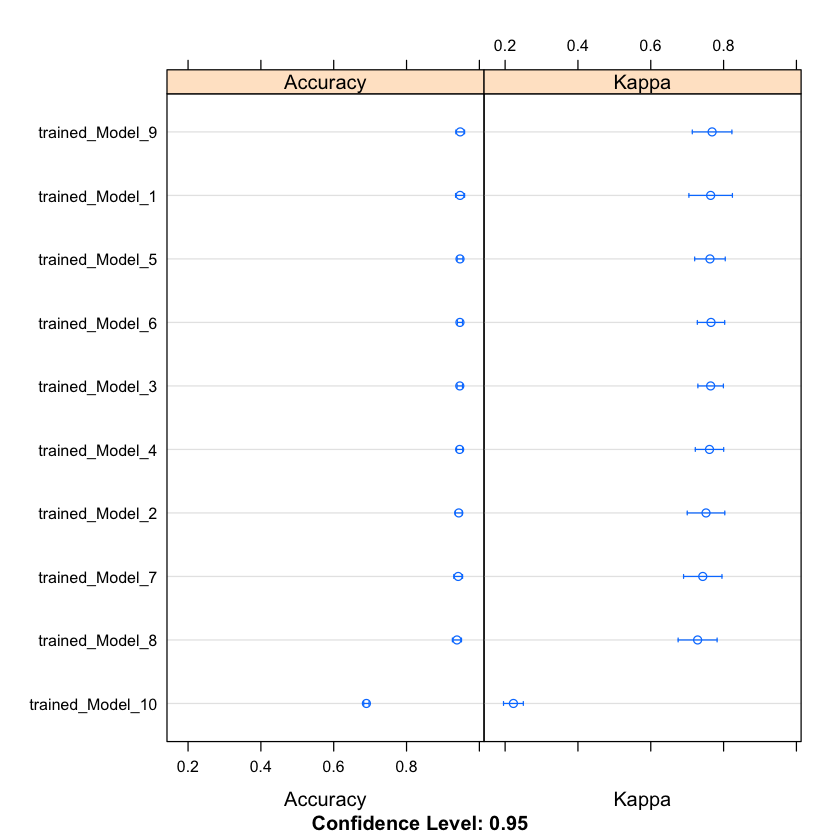

In [158]:
dotplot(results)

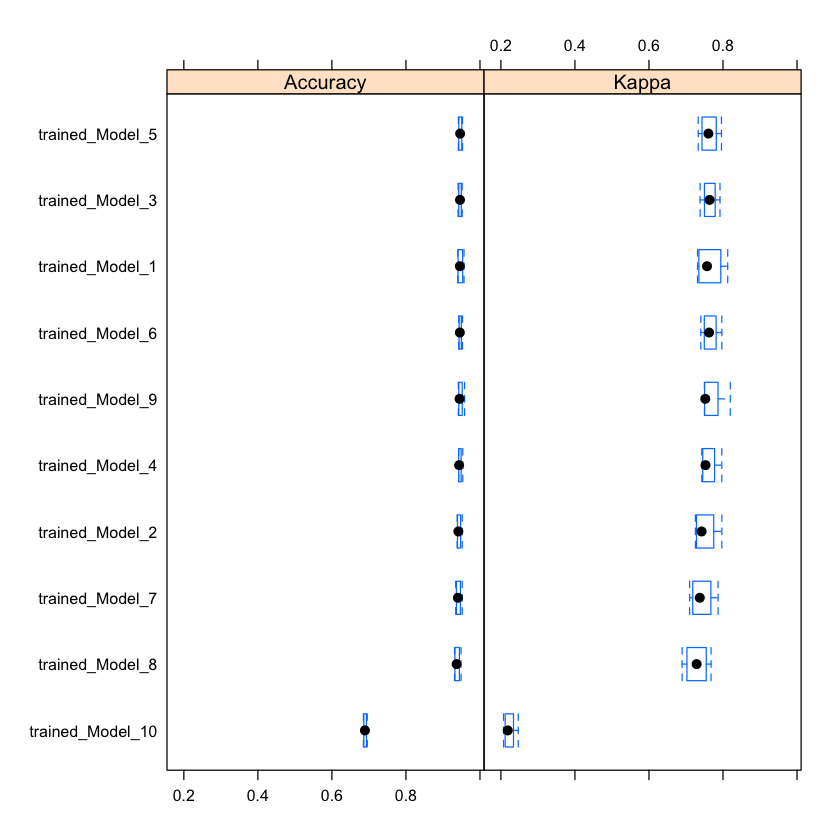

In [159]:
bwplot(results)

<h3>Assign the best trained model based on Accuracy</h3>

In [160]:
best_trained_model <- fit.ranger_automaticGrid

## 9. Test skill of the BEST trained model on validation/testing dataset 

In [161]:
predictions <- predict(best_trained_model, newdata=testing_dataset)

<h3>Evaluate the BEST trained model and print results</h3>

In [162]:
res_  <- caret::confusionMatrix(table(predictions, testing_dataset$Churn))
print("Results from the BEST trained model ... ...\n"); 
print(res_)
print(round(res_$overall, digits = 3))

[1] "Results from the BEST trained model ... ...\n"
Confusion Matrix and Statistics

           
predictions  no yes
        no  708  25
        yes   4  95
                                          
               Accuracy : 0.9651          
                 95% CI : (0.9503, 0.9765)
    No Information Rate : 0.8558          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.8477          
                                          
 Mcnemar's Test P-Value : 0.0002041       
                                          
            Sensitivity : 0.9944          
            Specificity : 0.7917          
         Pos Pred Value : 0.9659          
         Neg Pred Value : 0.9596          
             Prevalence : 0.8558          
         Detection Rate : 0.8510          
   Detection Prevalence : 0.8810          
      Balanced Accuracy : 0.8930          
                                          
       'Positive' Class : 

## 10. Save the model to disk

In [163]:
#getwd()
saveRDS(best_trained_model, "./best_trained_model.rds")

In [164]:
# load the model
#getwd()
saved_model <- readRDS("./best_trained_model.rds")
print(saved_model)

Random Forest 

2501 samples
  19 predictor
   2 classes: 'no', 'yes' 

Pre-processing: centered (19), scaled (19) 
Resampling: Cross-Validated (2 fold, repeated 2 times) 
Summary of sample sizes: 1250, 1251, 1251, 1250 
Resampling results across tuning parameters:

  mtry  splitrule   Accuracy   Kappa    
   2    gini        0.9072416  0.4970332
   2    extratrees  0.8696528  0.1637343
  19    gini        0.9410240  0.7443036
  19    extratrees  0.9474221  0.7684047

Tuning parameter 'min.node.size' was held constant at a value of 1
Accuracy was used to select the optimal model using the largest value.
The final values used for the model were mtry = 19, splitrule = extratrees
 and min.node.size = 1.


In [177]:
# make a predictions on "new data" using the final model
final_predictions <- predict(saved_model, dataSet[1:20])
confusionMatrix(table(final_predictions, dataSet$Churn))
res_ <- confusionMatrix(table(final_predictions, dataSet$Churn))
print("Results from the BEST trained model ... ...\n"); 
print(round(res_$overall, digits = 3))

Confusion Matrix and Statistics

                 
final_predictions   no  yes
              no  2846   25
              yes    4  458
                                          
               Accuracy : 0.9913          
                 95% CI : (0.9875, 0.9942)
    No Information Rate : 0.8551          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.9642          
                                          
 Mcnemar's Test P-Value : 0.0002041       
                                          
            Sensitivity : 0.9986          
            Specificity : 0.9482          
         Pos Pred Value : 0.9913          
         Neg Pred Value : 0.9913          
             Prevalence : 0.8551          
         Detection Rate : 0.8539          
   Detection Prevalence : 0.8614          
      Balanced Accuracy : 0.9734          
                                          
       'Positive' Class : no              
     

[1] "Results from the BEST trained model ... ...\n"
      Accuracy          Kappa  AccuracyLower  AccuracyUpper   AccuracyNull 
         0.991          0.964          0.988          0.994          0.855 
AccuracyPValue  McnemarPValue 
         0.000          0.000 


                 
final_predictions   no  yes
              no  2846   25
              yes    4  458


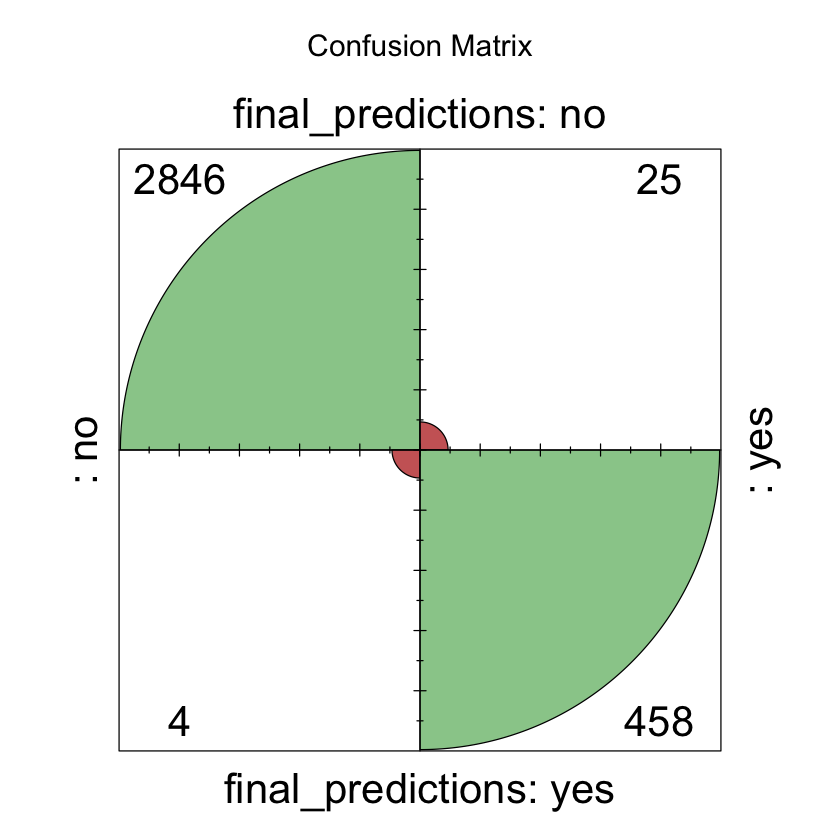

In [178]:
print(res_$table)
fourfoldplot(res_$table, color = c("#CC6666", "#99CC99"),
             conf.level = 0, margin = 1, main = "Confusion Matrix")

## REFERENCES

<ol>
    <li><a href="https://en.wikipedia.org/wiki/Random_forest"><i>Random forest
</i></a></li>
    <li><a href="http://gforge.se/2015/02/how-to-go-parallel-in-r-basics-tips/"><i>Code parallelizing in R</i></a></li>
</ol>